In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
import PIL
from PIL import Image

import tensorflow as tf

# For one-hot-encoding
from tensorflow.keras.utils import to_categorical
# For creating sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# For saving and loading models
from tensorflow.keras.models import load_model



import random

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [56]:
classes = os.listdir('E:\PKLot/vehicle/train/train')
BASE = 'E:\PKLot/vehicle/train/train/'

# create dict of list of images per class
dataset = {}
for vehicle in classes:
    dataset[vehicle] = [i for i in os.listdir(BASE + vehicle)]

In [57]:
# verify
print(dataset.keys())
print(len(dataset.keys()))

dict_keys(['Ambulance', 'Bicycle', 'Bus', 'Car', 'Limousine', 'Motorcycle', 'Segway', 'Tank', 'Taxi', 'Truck', 'Van'])
11


In [58]:
# convert dict to pandas df
df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

In [59]:
# train set
df.head()

Ambulance        Bicycle            Bus            Car      Limousine  \
0  000040_09.jpg  000001_00.jpg  000001_02.jpg  000001_08.jpg  000118_07.jpg   
1  000050_10.jpg  000001_19.jpg  000002_04.jpg  000001_11.jpg  000132_17.jpg   
2  000052_03.jpg  000004_07.jpg  000003_02.jpg  000001_16.jpg  000175_16.jpg   
3  000057_04.jpg  000004_15.jpg  000003_06.jpg  000001_18.jpg  000324_09.jpg   
4  000067_14.jpg  000010_09.jpg  000007_09.jpg  000002_13.jpg  000324_18.jpg   

      Motorcycle         Segway           Tank           Taxi          Truck  \
0  000001_15.jpg  000076_06.jpg  000040_06.jpg  000001_14.jpg  000001_04.jpg   
1  000002_06.jpg  000163_15.jpg  000041_00.jpg  000003_08.jpg  000002_03.jpg   
2  000003_15.jpg  000167_12.jpg  000043_00.jpg  000005_06.jpg  000003_05.jpg   
3  000003_16.jpg  000204_10.jpg  000064_07.jpg  000006_17.jpg  000005_10.jpg   
4  000004_00.jpg  000225_11.jpg  000074_12.jpg  000009_12.jpg  000006_12.jpg   

             Van  
0  000003_13.jpg  
1  000005_05.jpg  
2  000006_16.jpg  
3  000006_18.jpg  
4  000009_11.jpg

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ambulance   2141 non-null   object
 1   Bicycle     1618 non-null   object
 2   Bus         2133 non-null   object
 3   Car         6781 non-null   object
 4   Limousine   1574 non-null   object
 5   Motorcycle  2986 non-null   object
 6   Segway      2153 non-null   object
 7   Tank        2206 non-null   object
 8   Taxi        1748 non-null   object
 9   Truck       2033 non-null   object
 10  Van         2111 non-null   object
dtypes: object(11)
memory usage: 582.9+ KB


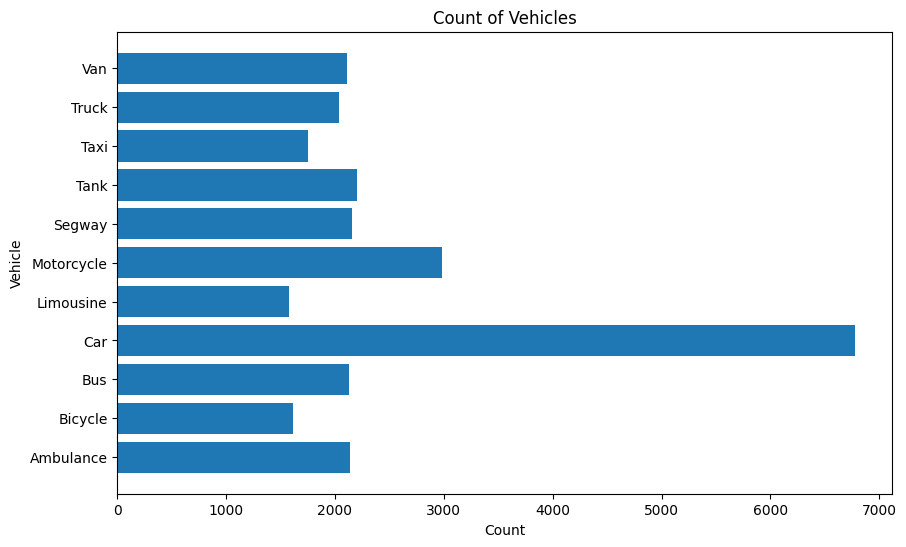

In [62]:
cols = []
col_imgs = []
for col in df.columns:
    cols.append(col)
    col_imgs.append(df[col].count())

plt.figure(figsize=(10,6))
plt.barh(cols, col_imgs)

plt.xlabel('Count')
plt.ylabel('Vehicle')
plt.title('Count of Vehicles')
plt.show()

Displaying 4 ranndom image per vehicle class


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

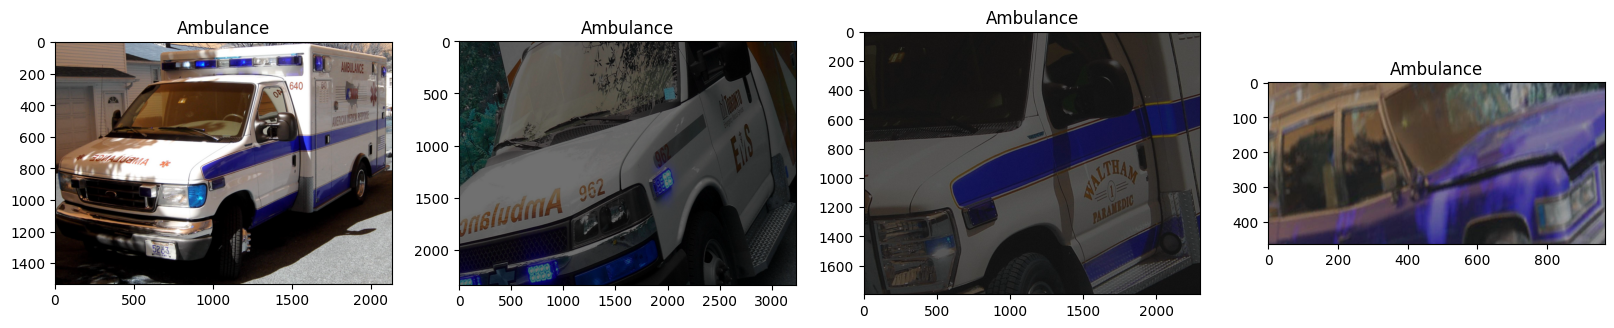

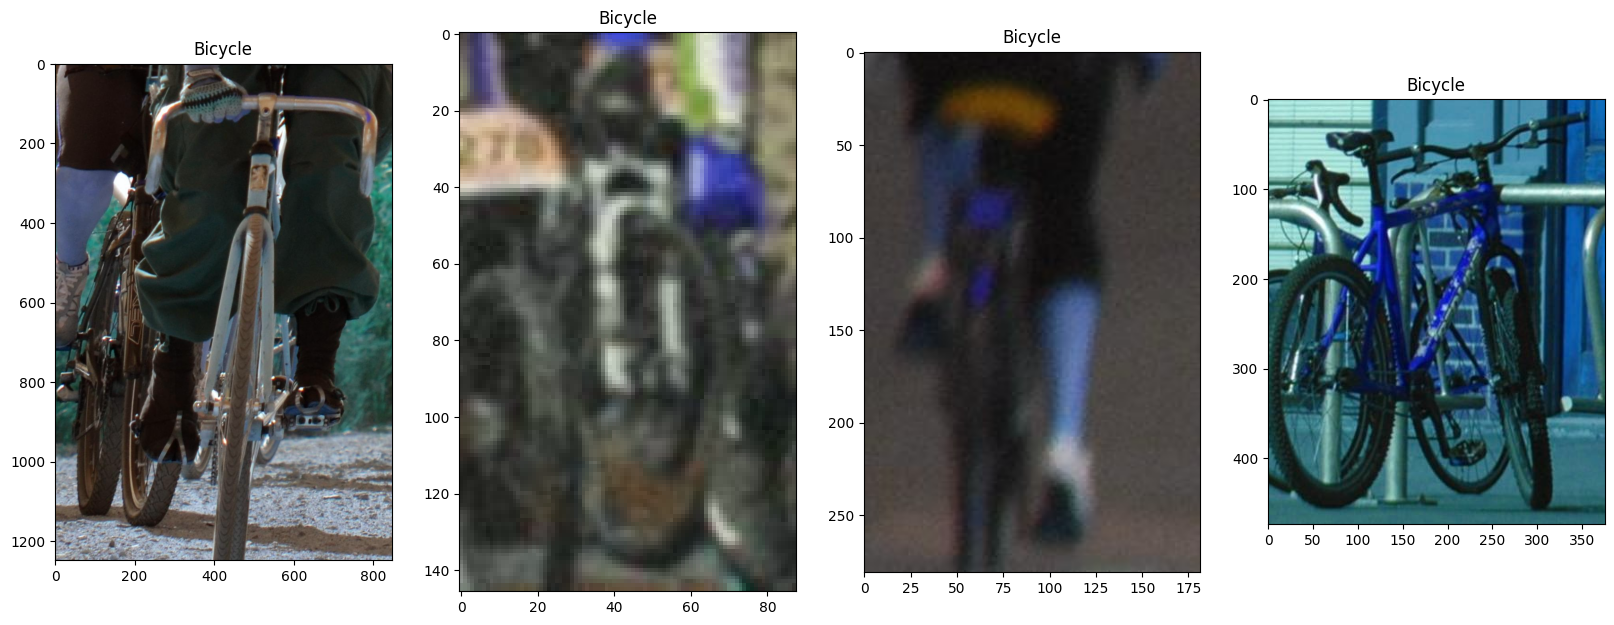

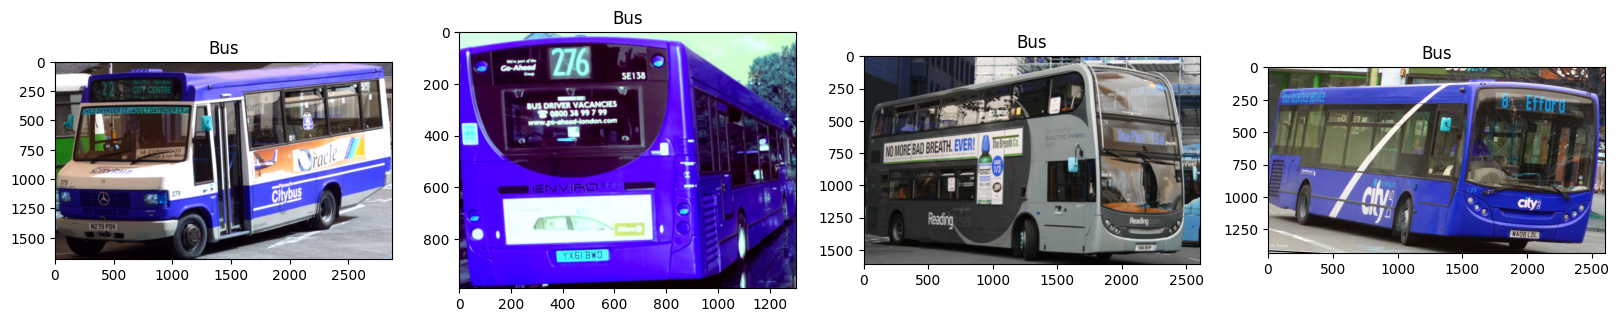

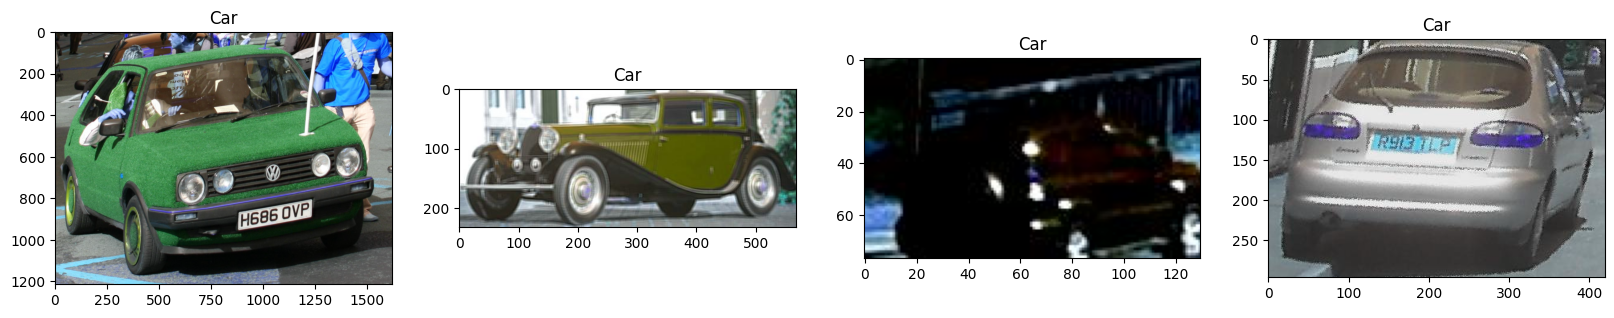

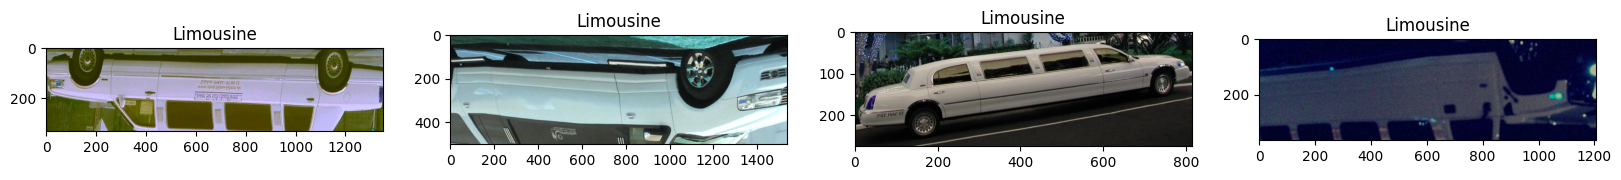

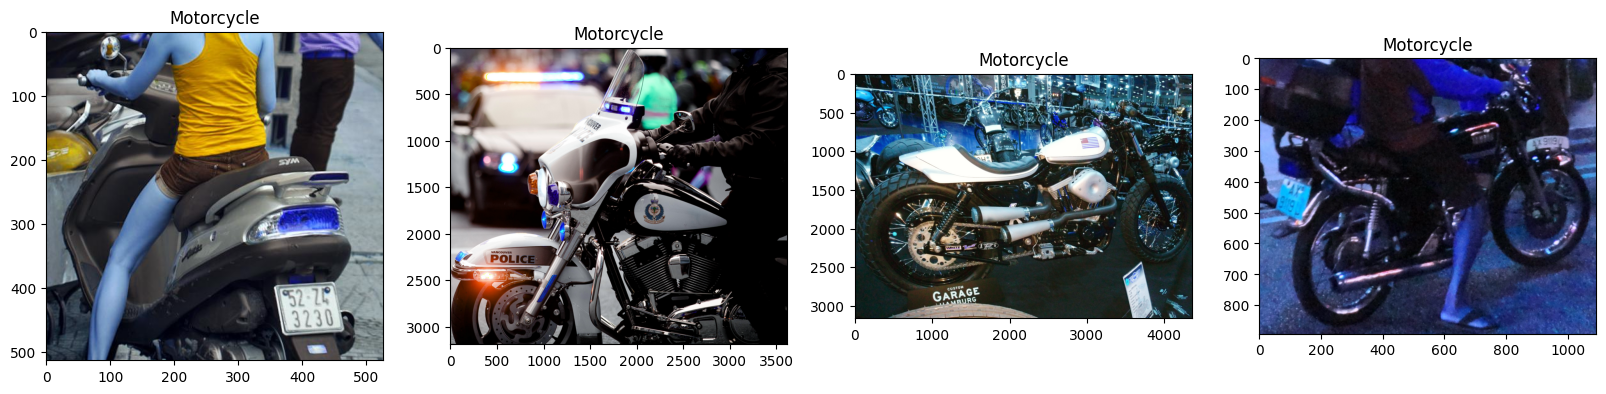

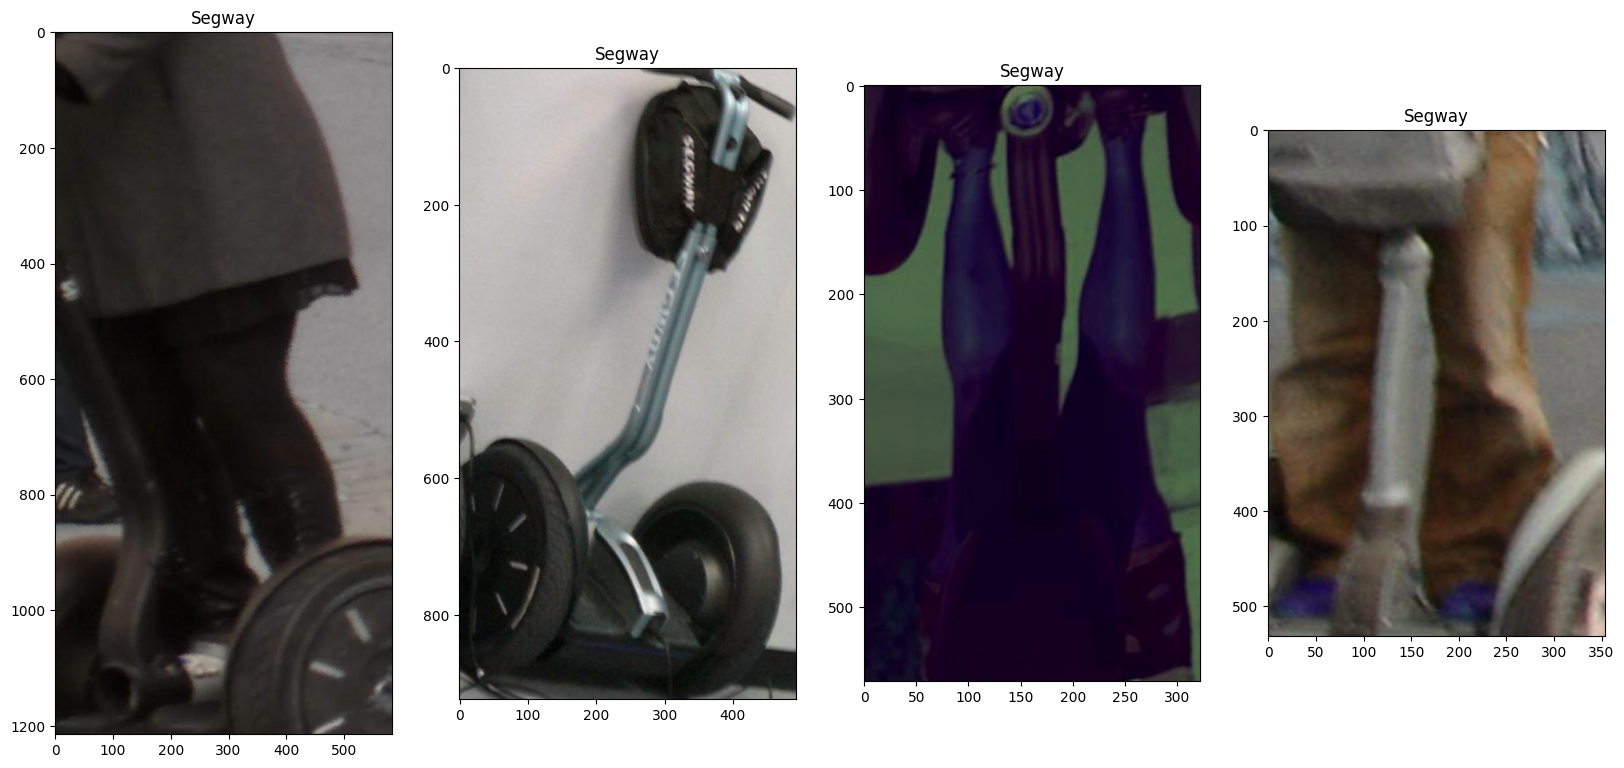

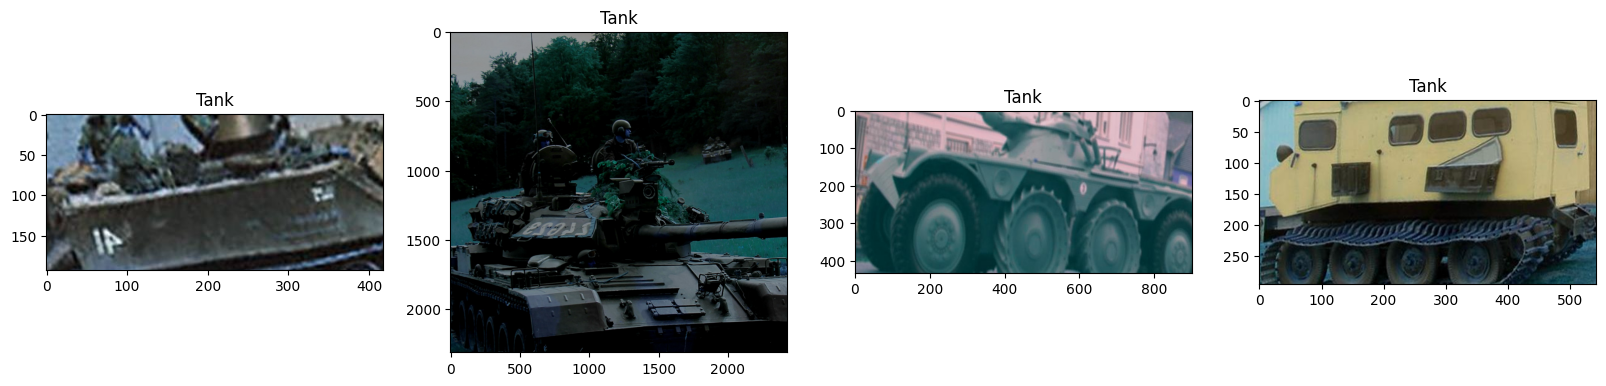

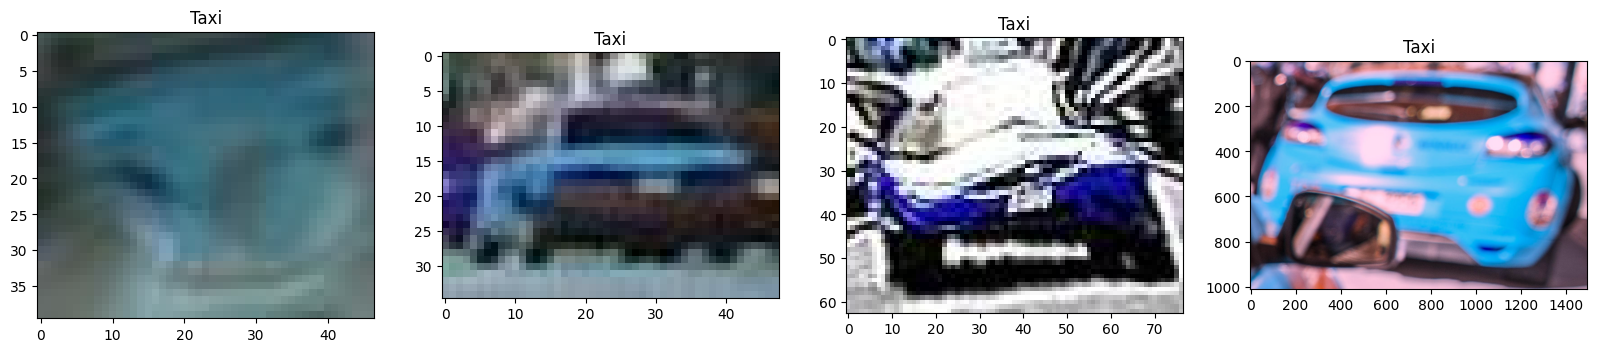

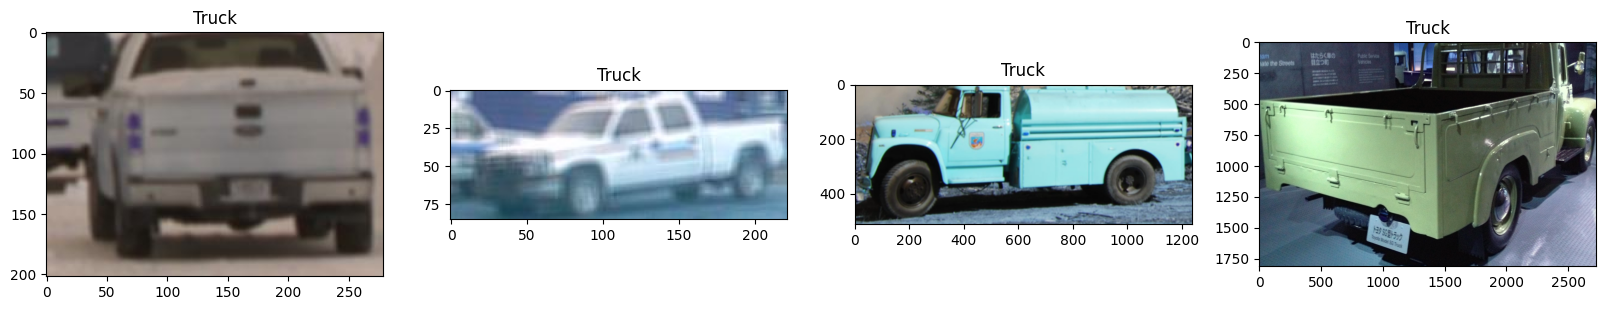

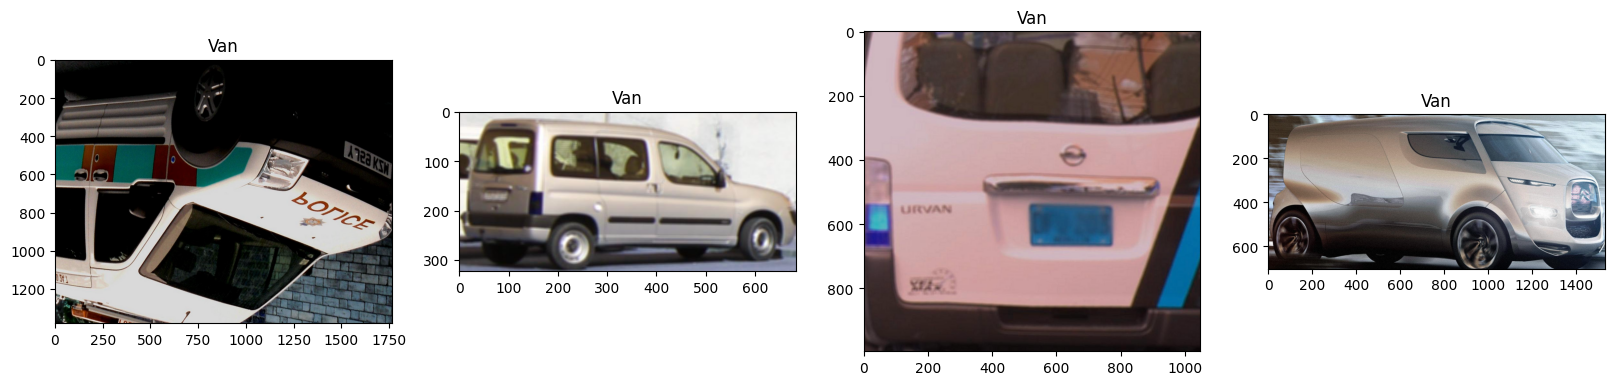

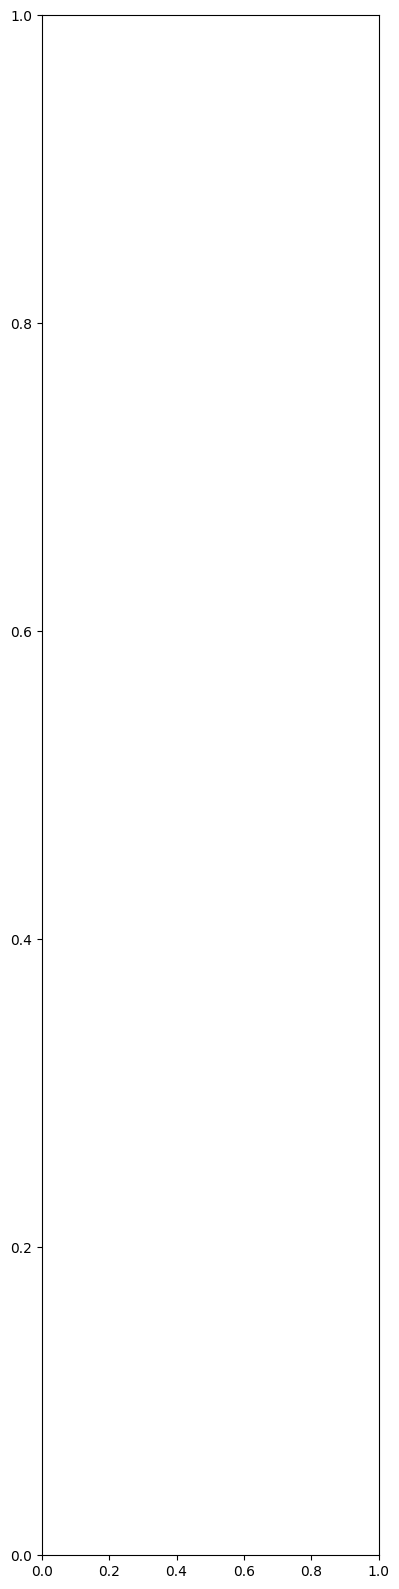

In [45]:
print("="*70)
print("Displaying 4 ranndom image per vehicle class")
print("="*70)

# for every class in `cols`
for j in range(17):
    plt.figure(j)
    plt.figure(figsize=(20,20))
    
    # 4 images per every class
    for i in range(4):
        id = "14{}".format(i+1)
        plt.subplot(int(id))
        random_file = random.choice(os.listdir(BASE + cols[j] + "/"))
        img = cv2.imread(BASE + cols[j] + "/" + random_file)
        plt.title(cols[j])
        plt.imshow(img)
plt.show()

Prepare Data For Training

In [46]:
data = []
labels = []

In [21]:

cols = sorted(cols)

# Creating trainable 224x224 images
#                    -------
# sample 
sample = 1
#max sample
max = 1000

for vehicle_class in cols:
    print(vehicle_class + " started .....")
    for filename in df[vehicle_class]:
        try:
            # for empty cols
            
            if filename == None:
                pass
            elif sample ==max:
                sample = 1
                break
            else:
                sample += 1
                image = cv2.imread("E:\PKLot/vehicle/train/train/{}/".format(vehicle_class) + filename)
                image_from_numpy_array = Image.fromarray(image, "RGB")
                resized_image = image_from_numpy_array.resize((224, 224))
                data.append(np.array(resized_image))

                if vehicle_class == 'Ambulance':
                    labels.append(0)
               
                elif vehicle_class == 'Bicycle':
                    labels.append(1)
               
                elif vehicle_class == 'Bus':
                    labels.append(2)
                elif vehicle_class == 'Car':
                    labels.append(3)
                
                
                
                elif vehicle_class == 'Limousine':
                    labels.append(4)
                elif vehicle_class == 'Motorcycle':
                    labels.append(5)
                elif vehicle_class == 'Segway':
                    labels.append(6)
                
                elif vehicle_class == 'Tank':
                    labels.append(7)
                elif vehicle_class == 'Taxi':
                    labels.append(8)
                elif vehicle_class == 'Truck':
                    labels.append(9)
                elif vehicle_class == 'Van':
                    labels.append(10)
                else:
                    print("Something is wrong.")
                
        except AttributeError:
            print("Attribute error occured for "+filename)


Ambulance started .....
Bicycle started .....
Bus started .....
Car started .....
Limousine started .....
Motorcycle started .....
Segway started .....
Tank started .....
Taxi started .....
Truck started .....
Van started .....


In [15]:
#data = np.load("all-vehicle-224x224-images-as-arrays.npy")
#labels = np.load("corresponding-labels-for-all-224x224-images.npy")

In [22]:

vehicle_images_224x224 = np.array(data)
labels_224x224 = np.array(labels)

# save
np.save("all-vehicle-224x224-images-as-arrays", vehicle_images_224x224)
np.save("corresponding-labels-for-all-224x224-images", labels_224x224)


In [47]:
data = np.load("all-vehicle-224x224-images-as-arrays.npy")
labels = np.load("corresponding-labels-for-all-224x224-images.npy")

In [48]:

print(vehicle_images_224x224.shape)
print(labels_224x224.shape)
print(np.unique(labels_224x224))


(10989, 224, 224, 3)
(10989,)
[ 0  1  2  3  4  5  6  7  8  9 10]


In [49]:
print(labels)

[ 0  0  0 ... 10 10 10]


In [50]:
from sklearn.model_selection import train_test_split

#Function for data segmentation and encoding
def load_data():
  xtrain, ytrain = data,labels
  # This will normalize your data. For images we only need to normalize the data by dividing it
  # over 255 thus the pixel normalized intensity range from 0-1.0
  xtrain = xtrain/255
  # test_size = 0.2 for train set 0f 40000, val. set of 10000, random state = 42
  xtrain, xtest, ytrain, ytest= train_test_split(xtrain,ytrain,test_size=0.2,random_state=42)
  xtrain, xval, ytrain, yval= train_test_split(xtrain,ytrain,test_size=0.2,random_state=42)
  #one hot encoder for ytrain
  ytrain_1hot = keras.utils.to_categorical(ytrain)
  #one hot encoder for yval
  yval_1hot = keras.utils.to_categorical(yval)
  #one hot encoder for yval
  ytest_1hot = keras.utils.to_categorical(ytest)
  #return all output
  return xtrain, ytrain_1hot, xval, yval_1hot, xtest, ytest_1hot

In [51]:
#calling the load_cifar10() function
xtrain, ytrain_1hot, xval, yval_1hot, xtest, ytest_1hot = load_data()

In [29]:
print(ytrain_1hot[10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [59]:
# Assuming value and dtype are already defined
with tf.device('/CPU:0'):
    eager_tensor = tf.convert_to_tensor(value, dtype=dtype)


NameError: name 'value' is not defined

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [4]:
input_path = "E:\PKLot/working/data/"

In [5]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=32,
    #class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'test',
    shuffle=False,
    #class_mode='binary',
    target_size=(224,224))

Found 13200 images belonging to 11 classes.
Found 3300 images belonging to 11 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [10]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(11, activation='softmax')(x)
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model = Model(conv_base.input, predictions)

In [11]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=347 // 32,  # added in Kaggle
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10,  # added in Kaggle
                              #callbacks=[early_stop]
                             )

C:\Users\swaru\AppData\Local\Temp\ipykernel_39548\2381294717.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
10/10 [==============================] - 11s 882ms/step - loss: 1.9889 - accuracy: 0.4281 - val_loss: 1.0280 - val_accuracy: 0.5688
Epoch 2/30
10/10 [==============================] - 7s 736ms/step - loss: 0.9264 - accuracy: 0.7000 - val_loss: 2.0265 - val_accuracy: 0.4313
Epoch 3/30
10/10 [==============================] - 7s 735ms/step - loss: 0.7791 - accuracy: 0.7281 - val_loss: 2.5298 - val_accuracy: 0.2719
Epoch 4/30
10/10 [==============================] - 7s 716ms/step - loss: 0.8888 - accuracy: 0.7219 - val_loss: 1.2531 - val_accuracy: 0.5906
Epoch 5/30
10/10 [==============================] - 7s 710ms/step - loss: 0.6693 - accuracy: 0.7656 - val_loss: 0.3431 - val_accuracy: 0.8781
Epoch 6/30
10/10 [==============================] - 7s 692ms/step - loss: 0.6566 - accuracy: 0.8094 - val_loss: 3.7091 - val_accuracy: 0.2500
Epoch 7/30
10/10 [==============================] - 7s 719ms/step - loss: 0.6156 - accuracy: 0.8062 - val_loss: 1.4828 - val_accuracy: 0.5188
Epoch

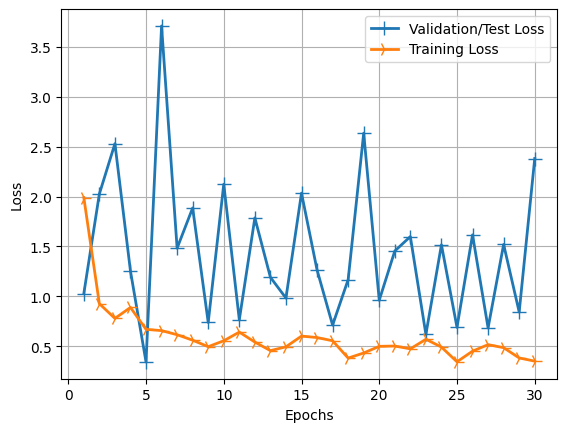

In [15]:
# plot loss chart
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [92]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import layers, models, optimizers
#define decay parameter
decay_function = ExponentialDecay(0.001,decay_steps=2000,decay_rate=0.95)
#define optimizer
optimization = optimizers.Adam(learning_rate= 0.001)
#buildup the  model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=347 // 32,  # added in Kaggle
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10,  # added in Kaggle
                              #callbacks=[early_stop]
                             )


C:\Users\swaru\AppData\Local\Temp\ipykernel_11144\3274744087.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
10/10 [==============================] - 9s 778ms/step - loss: 0.3566 - accuracy: 0.8813 - val_loss: 1.4561 - val_accuracy: 0.5906
Epoch 2/30
10/10 [==============================] - 7s 700ms/step - loss: 0.4667 - accuracy: 0.8438 - val_loss: 0.9989 - val_accuracy: 0.6812
Epoch 3/30
10/10 [==============================] - 6s 666ms/step - loss: 0.4280 - accuracy: 0.8656 - val_loss: 0.5169 - val_accuracy: 0.8594
Epoch 4/30
10/10 [==============================] - 7s 728ms/step - loss: 0.4101 - accuracy: 0.8687 - val_loss: 2.0630 - val_accuracy: 0.3688
Epoch 5/30
10/10 [==============================] - 7s 703ms/step - loss: 0.4065 - accuracy: 0.8562 - val_loss: 2.8032 - val_accuracy: 0.3375
Epoch 6/30
10/10 [==============================] - 6s 668ms/step - loss: 0.4465 - accuracy: 0.8500 - val_loss: 0.6410 - val_accuracy: 0.8094
Epoch 7/30
10/10 [==============================] - 6s 666ms/step - loss: 0.3865 - accuracy: 0.8656 - val_loss: 2.4044 - val_accuracy: 0.3438
Epoch 

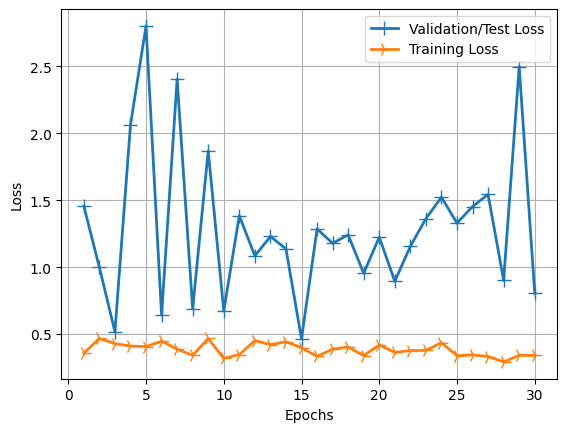

In [93]:
# plot loss chart
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
del model
del history

NameError: name 'model' is not defined

In [15]:
x = conv_base.output
x = layers.Conv2D(filters=128, kernel_size=(1,1), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(11, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [16]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import layers, models, optimizers
#define decay parameter
decay_function = ExponentialDecay(0.001,decay_steps=2000,decay_rate=0.95)
#define optimizer
optimization = optimizers.Adam(learning_rate= 0.001)
#buildup the  model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=347 // 32,  # added in Kaggle
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10,  # added in Kaggle
                              #callbacks=[early_stop]
                             )


C:\Users\swaru\AppData\Local\Temp\ipykernel_35836\3274744087.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
10/10 [==============================] - 10s 793ms/step - loss: 2.5369 - accuracy: 0.2000 - val_loss: 2.6673 - val_accuracy: 0.0500
Epoch 2/30
10/10 [==============================] - 6s 666ms/step - loss: 1.7428 - accuracy: 0.3656 - val_loss: 2.2466 - val_accuracy: 0.1813
Epoch 3/30
10/10 [==============================] - 6s 655ms/step - loss: 1.4388 - accuracy: 0.4938 - val_loss: 1.8280 - val_accuracy: 0.3281
Epoch 4/30
10/10 [==============================] - 7s 726ms/step - loss: 1.1437 - accuracy: 0.6031 - val_loss: 1.6124 - val_accuracy: 0.5969
Epoch 5/30
10/10 [==============================] - 7s 686ms/step - loss: 1.0437 - accuracy: 0.6187 - val_loss: 0.7379 - val_accuracy: 0.7750
Epoch 6/30
10/10 [==============================] - 6s 645ms/step - loss: 0.9636 - accuracy: 0.6812 - val_loss: 0.8942 - val_accuracy: 0.6469
Epoch 7/30
10/10 [==============================] - 6s 670ms/step - loss: 0.9508 - accuracy: 0.6711 - val_loss: 0.7318 - val_accuracy: 0.7469
Epoch

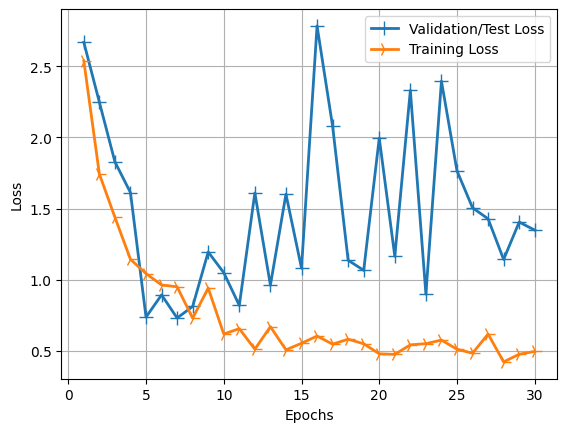

In [17]:
# plot loss chart
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
del model
del history

In [15]:
x = conv_base.output
x = layers.Conv2D(filters=128, kernel_size=(1,1), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(11, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [17]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import layers, models, optimizers
#define decay parameter
decay_function = ExponentialDecay(0.001,decay_steps=2000,decay_rate=0.95)
#define optimizer
#optimization = optimizers.Adam(learning_rate= 0.001)
optimizer = keras.optimizers.Adam()
#buildup the  model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=347 // 32,  # added in Kaggle
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=20,  # added in Kaggle
                              #callbacks=[early_stop]
                             )


C:\Users\swaru\AppData\Local\Temp\ipykernel_38140\3530356711.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/40
10/10 [==============================] - 15s 1s/step - loss: 2.4911 - accuracy: 0.1688 - val_loss: 1.5431 - val_accuracy: 0.6547
Epoch 2/40
10/10 [==============================] - 10s 1s/step - loss: 1.6495 - accuracy: 0.4812 - val_loss: 0.8018 - val_accuracy: 0.7141
Epoch 3/40
10/10 [==============================] - 9s 999ms/step - loss: 0.9576 - accuracy: 0.6781 - val_loss: 0.5706 - val_accuracy: 0.8125
Epoch 4/40
10/10 [==============================] - 9s 996ms/step - loss: 0.8476 - accuracy: 0.6719 - val_loss: 0.5419 - val_accuracy: 0.8359
Epoch 5/40
10/10 [==============================] - 10s 1s/step - loss: 0.7344 - accuracy: 0.7656 - val_loss: 0.8177 - val_accuracy: 0.7203
Epoch 6/40
10/10 [==============================] - 10s 1s/step - loss: 0.6380 - accuracy: 0.7906 - val_loss: 0.5382 - val_accuracy: 0.8188
Epoch 7/40
10/10 [==============================] - 10s 1s/step - loss: 0.6879 - accuracy: 0.7688 - val_loss: 0.3866 - val_accuracy: 0.8672
Epoch 8/40
10/10

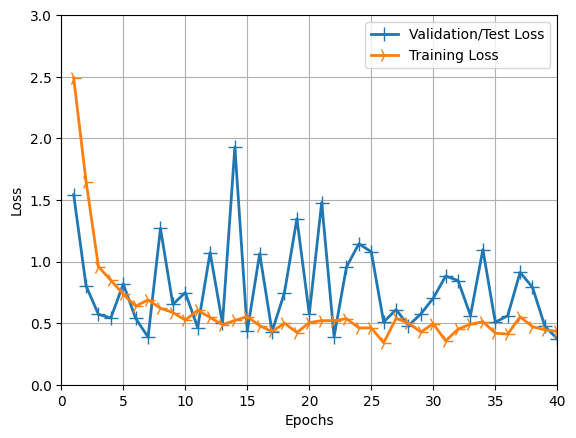

In [18]:
# plot loss chart
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.axis([0,40,0,3])
plt.legend()
plt.show()

In [23]:
# Save the model
model.save("E:/PKLot/vehicle/model.h5")

In [24]:
validation_generator.labels

array([ 0,  0,  0, ..., 10, 10, 10])

In [25]:
predicted_labels = model.predict(validation_generator)

104/104 [==============================] - 23s 218ms/step


In [26]:
predicted_labels = np.argmax(predicted_labels, axis=1)

In [27]:
# Print the predicted labels
print("Predicted labels:", predicted_labels)

Predicted labels: [ 0  0  0 ...  9 10 10]


In [28]:
#label maping
label_mapping ={0:'Ambulance',1: 'Bicycle',2: 'Bus',3: 'Car',4: 'Limousine',5: 'Motorcycle',6: 'Segway',7: 'Tank',8: 'Taxi',9: 'Truck',10: 'Van'}

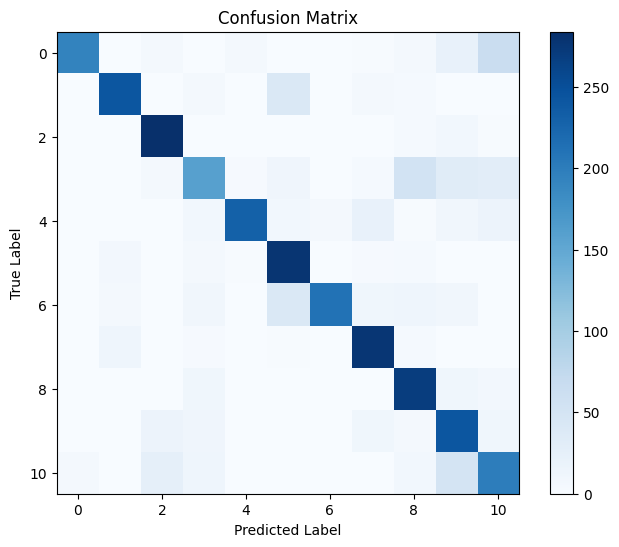

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels for your test dataset
# Replace true_labels with your actual true labels
true_labels = validation_generator.labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


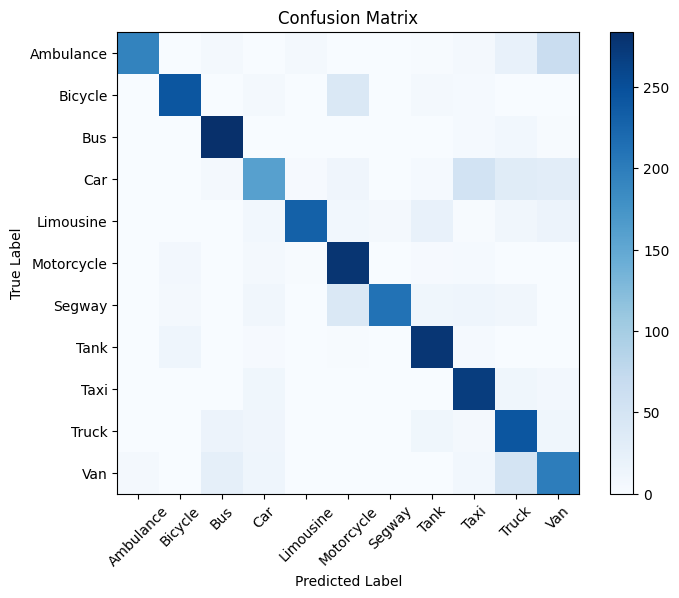

In [30]:
# Convert numerical labels to string labels
true_string_labels = [label_mapping[label] for label in true_labels]
predicted_string_labels = [label_mapping[label] for label in predicted_labels]

# Compute confusion matrix using string labels
conf_matrix = confusion_matrix(true_string_labels, predicted_string_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(label_mapping)), label_mapping.values(), rotation=45)
plt.yticks(np.arange(len(label_mapping)), label_mapping.values())
plt.show()

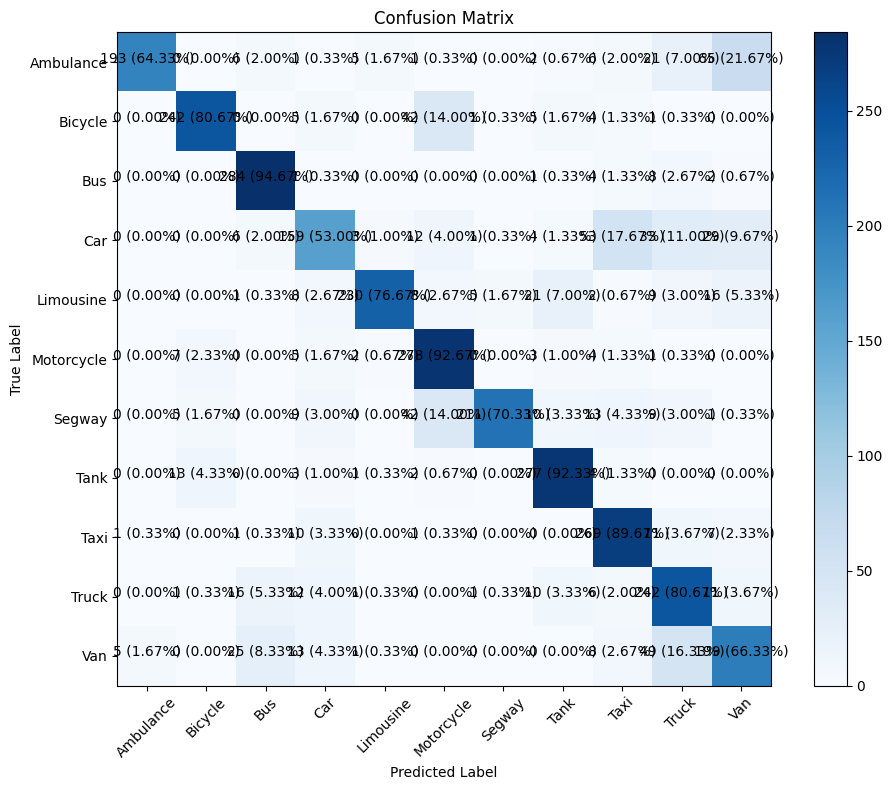

In [31]:
# Compute confusion matrix using string labels
conf_matrix = confusion_matrix(true_string_labels, predicted_string_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# Add text annotations with the predicted probabilities
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]} ({conf_matrix[i, j] / np.sum(conf_matrix[i]):.2%})',
                 horizontalalignment="center", color="black")

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(label_mapping)), label_mapping.values(), rotation=45)
plt.yticks(np.arange(len(label_mapping)), label_mapping.values())
plt.tight_layout()
plt.show()

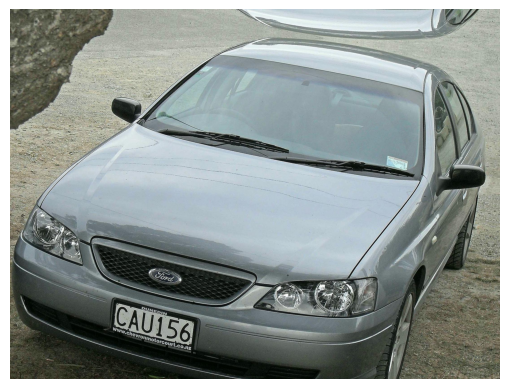

In [38]:
#test in image

test_image = cv2.imread("E:\PKLot/vehicle/test/testset/000017.jpg")



# Convert from BGR to RGB
image_rgb = cv2.cvtColor(test_image , cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


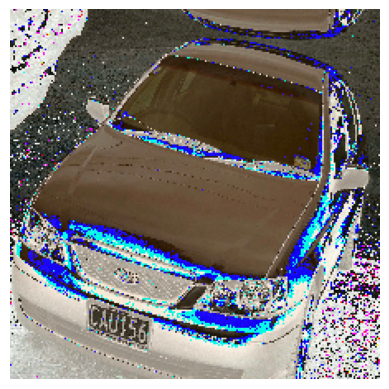

In [32]:
# Load the single image
image_path = "E:/PKLot/vehicle/test/testset/000017.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resize the image to 224x224
resized_image = cv2.resize(image, (224, 224))

# Create an ImageDataGenerator for test with preprocessing function
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Reshape the image to (1, height, width, channels)
resized_image = np.expand_dims(resized_image, axis=0)

# Generate batches of images
batch_size = 1
test_generator = test_datagen.flow(resized_image, batch_size=batch_size)

# Display the preprocessed image (optional)
for images in test_generator:
    plt.imshow(images[0].astype(np.uint8))
    plt.axis('off')
    plt.show()
    break  # Only display the first batch, as there's only one image


In [49]:
predicted_labels = model.predict(test_generator)
predicted_labels = np.argmax(predicted_labels, axis=1)
# Print the predicted labels
print("Predicted labels:", predicted_labels)

1/1 [==============================] - 0s 34ms/step
Predicted labels: [3]


In [50]:
def test_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Resize the image to 224x224
    resized_image = cv2.resize(image, (224, 224))

    # Create an ImageDataGenerator for test with preprocessing function
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Reshape the image to (1, height, width, channels)
    resized_image = np.expand_dims(resized_image, axis=0)

    # Generate batches of images
    batch_size = 1
    test_generator = test_datagen.flow(resized_image, batch_size=batch_size)
    predicted_labels = model.predict(test_generator)
    predicted_labels = np.argmax(predicted_labels, axis=1)
    #label maping
    label_mapping ={0:'Ambulance',1: 'Bicycle',2: 'Bus',3: 'Car',4: 'Limousine',5: 'Motorcycle',6: 'Segway',7: 'Tank',8: 'Taxi',9: 'Truck',10: 'Van'}
    predicted_string_labels = [label_mapping[label] for label in predicted_labels]
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title( predicted_string_labels )
    plt.show()
    
    return predicted_string_labels
   
    

1/1 [==============================] - 0s 39ms/step


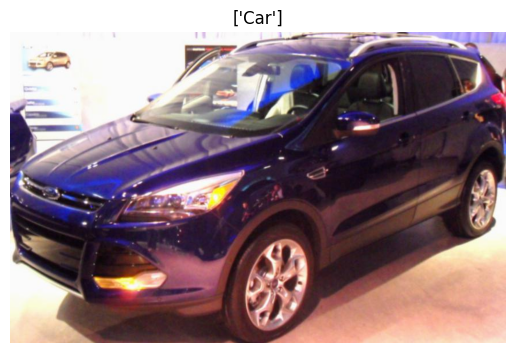

In [54]:
image_path = "E:/PKLot/vehicle/test/testset/000300.jpg"
predicted_labels = test_image(image_path)
#print(predicted_labels)

In [ ]:
image_path = "E:/PKLot/vehicle/test/testset/000300.jpg"
predicted_labels = test_image(image_path)